<a href="https://colab.research.google.com/github/CarlosZ1234/SSF-Oto24-Carlos-Daniel-Zu-iga-Alvarez/blob/main/Copia_de_Lorenz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto: Sistema de Lorenz

Autor: <a href="https://github.com/leflores-fisi">Flores Cóngora, Paolo</a>.

Proyecto final del curso de <a href="https://www.pec3.org/index.php?show=events_scientificcomputinginpython">Computación Científica en Python</a> impartido por la organización <a href="https://www.pec3.org/">Pec3</a>.

Este notebook está alojado en un <a href="https://github.com/leflores-fisi/lorenz-attractor">repositorio de Github</a>, para revisiones véase el <a href="https://colab.research.google.com/drive/16vDPPREadbj5ZFKzJ-0dTnJSnGXwTsT_">proyecto original en Google Colab</a>.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

<img src="https://raw.githubusercontent.com/leflores-fisi/lorenz-attractor/main/imgs/lorenz_attractor.png" width=350 heigth=150>

El atractor de Lorenz es un sistema tridimensional determinista de comportamiento caótico.

Esto es, dados los mismos parámetros iniciales, y en el mismo instante de tiempo, obtendremos los mismos resultados, mas sin embargo, será extremadamente sensitivo a estos, dando el sello característico de la <a href="https://es.wikipedia.org/wiki/Teor%C3%ADa_del_caos" target="_blank">Teoría del caos</a>.

### Pequeña historia
Entre los **sistemas caóticos** conocidos resalta la atmósfera terrestre, la cual Lorenz como meteorólogo estudiaba.

Trabajando en un sistema de 12 variables, quiso replicar uno de sus cálculos anteriores. Dejó la computadora haciendo el trabajo, fue por un café, y cuando regresó, a pesar de haber partido de los mismos parámetros iniciales, obtuvo un resultado absurdamente distinto. ¿Qué había pasado?

La computadora que Lorenz había usado no estaba averiada, los números que introdujo habían sido redondeados por milésimas. Los cálculos eran correctos, y sin embargo los resultados arrojaban condiciones climáticas totalmente separadas, es así como Lorenz descubre el caos.

Simplificando la ecuación para facilitar su estudio, formuló el siguiente sistema:

\begin{align}
\frac{dx}{dt} &= \sigma(y - x) \\
\frac{dy}{dt} &= x(\rho - z) - y \\
\frac{dz}{dt} &= xy - \beta z
\end{align}

Donde $σ$, $ρ$ y $β$ son constantes físicas atmosféricas.


Un sistema de 3 dimensiones que cambia dinámicamente con respecto al tiempo.

Es impredecible, pues no responde a ninguna ley.

Pero a la vez es determinista, pues dadas unas condiciones iniciales, podemos conocer su evolución exacta en el futuro.

Es caótico.

Sistema que luego se presentó junto al nombre del "Efecto mariposa".

<img src="https://raw.githubusercontent.com/leflores-fisi/lorenz-attractor/main/imgs/lorenz_butterfly.jpg" width=350 heigth=150>

## Implementación en Python
Python nos proporciona librerías fascinantes como `numpy` y `matplotlib` para trabajar con matrices y visualización de datos.

Si conocemos el fenómeno numéricamente, podremos representarlo.

Para ello, trabajaremos con la misma ecuación definida por Lorenz en 1963, calcularemos todos sus puntos para un intervalo de tiempo definido, y los llevaremos a una gráfica tridimensional, donde está la belleza de estas ecuaciones.

## Tareas propuestas
A continuación, las resoluciones de las 5 tareas propuestas para el proyecto final.

### Tarea 1
> «*Implemente la función representativa del sistema en lenguaje Python.
Tenga en cuenta que la variable de estado sería un ndArray de 3 dimensiones. Por otra parte, la función recibe los parámetros de entrada
σ , ρ y β*».


Definimos la función `solve_lorenz` en un estado cualquiera `(x, y, z)` con parámetros físicos definidos.

Nótese que en los argumentos está presente un instante `t`, este nos servirá para implementar la función directamente en la Tarea 2.

In [ ]:
def solve_lorenz(state, t, σ, ρ, β):
  x, y, z = state

  dx = σ * (y - x)
  dy = x * (ρ - z) - y
  dz = (x * y) - (β * z)
  return dx, dy, dz

# Ejemplo resolviendo para ciertas condiciones iniciales
solve_lorenz((1, 1, 1), t=1, σ=10, ρ=28, β=8/3)

(0, 26, -1.6666666666666665)

### Tarea 2
> «*Escriba el código correspondiente a la simulación de este sistema para un intervalo de tiempo $t ∈ [0, 100]$ que contenga 3000 valores equidistantes. Además utilice los parámetros $σ = 10$, $ρ = 28$, $β = 8/3$ y el vector de condiciones iniciales $(1, 1, 1)$. Emplee para ello la función
`odeint`*».

Para esto, definiremos un estado de coordenadas iniciales `initial_state` y con ayuda de la función `numpy.linspace` crearemos intervalos de tiempo espaciados uniformemente.

In [ ]:
initial_state = (1., 1., 1.)
σ, ρ, β = 10, 28, 8/3

t = np.linspace(0, 100, 3000)

print('Valores equidistantes de t:', t.size)

Valores equidistantes de t: 3000


La función `odeint`, *ordinary differential equations integration*, como su nombre indica, nos ayudará a resolver el sistema (con la función `solve_lorenz` previamente implementada) para una secuencia de puntos `t` en el tiempo.

In [ ]:
states = odeint(solve_lorenz, initial_state, t, args=(σ, ρ, β))

xs = states[:, 0]
ys = states[:, 1]
zs = states[:, 2]

Si bien es cierto pudo resolverse el sistema un número determinado de veces para un `dt` definido y almacenar los resultados en 3 vectores, resulta más fácil, al ser una *ecuación diferencial ordinaria simple*, usar `odeint` para este trabajo.

Ahora instanciamos un `pyplot.figure` con proyección 3d para representar los datos obtenidos.

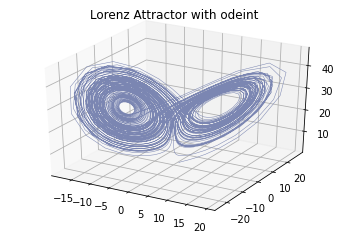

In [ ]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(xs, ys, zs, lw=0.5, c='#7B86B2')
ax.set_title("Lorenz Attractor with odeint")
plt.show()

### Tarea 3
> «*Cree una gráfica en 3 dimensiones que utilice la paleta de colores llamada `plt.cm.plasma` para representar la solución la cual deberá de tener una forma similar a la Figura 1*».

<figure align="center">
<img src="https://raw.githubusercontent.com/leflores-fisi/lorenz-attractor/ef0f459574d3142709b7053c9d3f8e1a28dc9d30/imgs/pec3_figure1.png" align="center" width="300"/>
<figcaption align="center"><i>Figura 1</i></figcaption>
</figure>

`matplotlib.pyplot.cm` proporciona una lista de `colormaps` cuyos elementos están listados en `plt.colormaps()`.

El `colormap` 'plasma' está disponible en `matplotlib.pyplot.cm.plasma`

In [ ]:
cmap = plt.cm.plasma
print("Tipo del objeto colormap:", type(cmap))
# Los colores pueden ser accedidos directamente por indexación
print("Elemento indexado:", cmap(0))

Tipo del objeto colormap: <class 'matplotlib.colors.ListedColormap'>
Elemento indexado: (0.050383, 0.029803, 0.527975, 1.0)


Para ordenar el trabajo, podemos envolver el proceso de la Tarea 2 dentro de una función que reciba el **estado inicial** y **las constantes**.

Trabajaremos de la misma forma, pero en lugar de *plotear* directamente los resultados del `odeint`, los iteraremos para aplicar en intervalos `s` los valores correspondientes de nuestro `colormap`.

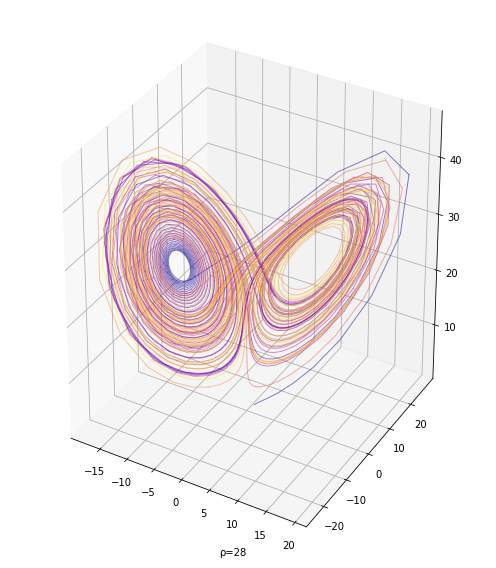

In [ ]:
def lorenz_attractor(state0, parameters, ax=None, text_offset=0.01):
  σ, ρ, β = parameters
  n = 3000
  t = np.linspace(0, 100, n)

  # Resolvemos las ecuaciones para la secuencia de puntos t
  states = odeint(solve_lorenz, state0, t, args=(σ, ρ, β))
  xs = states[:, 0]
  ys = states[:, 1]
  zs = states[:, 2]

  if ax is None:
    ax = plt.figure(figsize=(7, 8)).add_subplot(projection='3d')

  # Intervalos de 10 unidades de ancho
  s = 10

  # Iteramos en estos intervalos aplicando el colormap correspondiente
  for i in range(0, n-s ,s):
    ax.plot(xs[i:i+s+1], ys[i:i+s+1], zs[i:i+s+1], color=cmap(i/n), alpha=0.5, lw=1)

  ax.text2D(0.44, text_offset, f"ρ={ρ}", transform=ax.transAxes)
  ax.figure.tight_layout()
  return ax.figure

# Condiciones iniciales propuestas en la Figura 1
lorenz_attractor((1, 1, 1), (10, 28, 8/3)).show()

### Tarea 4
> «*Solucione el mismo problema con los mismos parámetros a excepción de $ρ$ el cual tomará los valores $−42$, $15$, $28$ y $100$. Almacene las respuestas en dos listas, una para el parámetro $ρ$ y la otra para la solución correspondiente.*».

Entonces, almacenamos los 4 valores para la constante $ρ$ en `rho_values` y ejecutamos nuestro `lorenz_attractor` para cada valor de $ρ$, con todo lo demás constante, obteniendo así los resultado esperados.

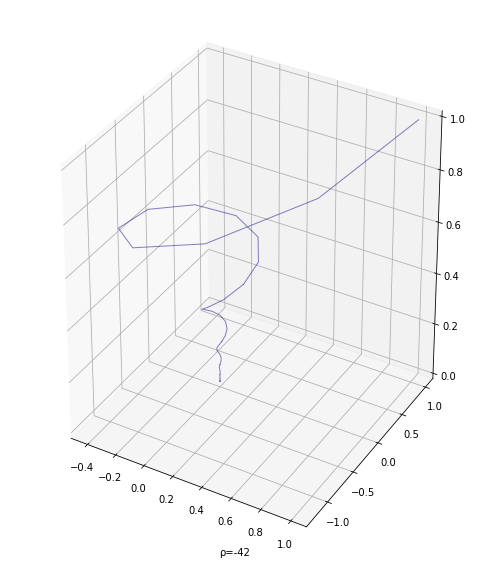

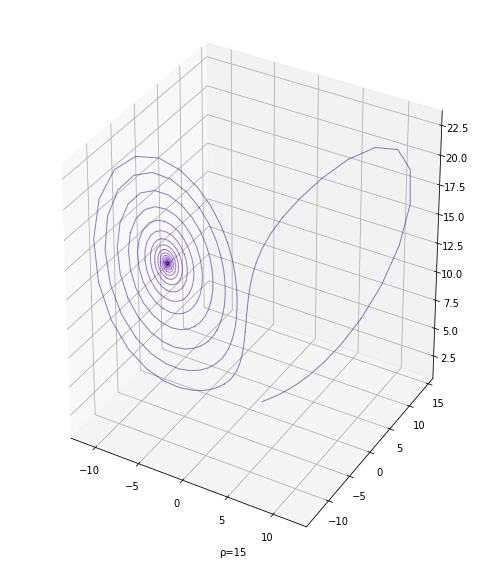

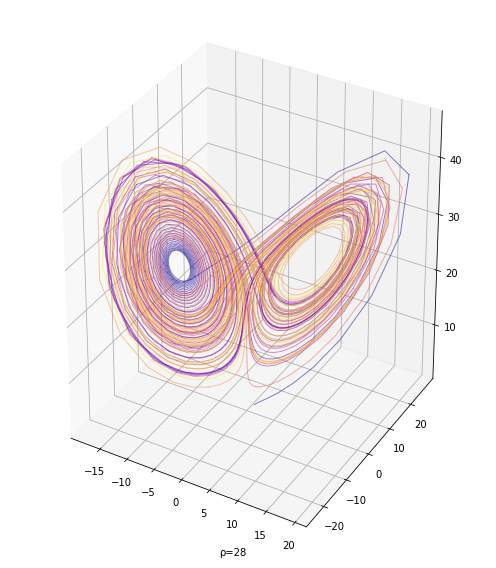

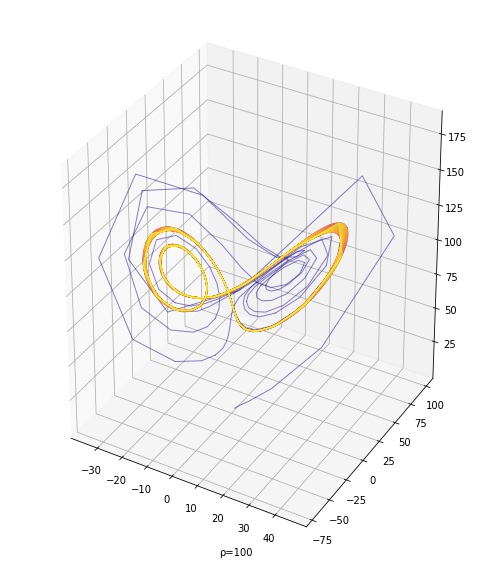

In [ ]:
rho_values = [-42, 15, 28, 100]
solutions = [lorenz_attractor((1, 1, 1), (10, rho, 8/3)) for rho in rho_values]

for solution in solutions:
  solution.show()

### Tarea 5
> «*Cree gráficas de 3 dimensiones para representar cada solución, todas
en la misma figura. Para ello cree una figura de 2 fila y 2 columnas.
Coloque en el texto del título de la gráfica el parámetro $ρ$ igualado a
el valor correspondiente en cada caso. Garantice que la figura tenga
un tamaño de $10 × 10$*».

Definimos el parámetro para la figura, `size=(10, 10)` con 2 filas y dos columnas, esto es, 4 `subplots` dentro de ella.

In [ ]:
rows, cols = 2, 2
size = (10, 10)

Instanciaremos la figura e iteraremos los `axes` bidimensionalmente para cada `axe` de la figura con un valor específico de $ρ$. Esto con ayuda de `numpy.ndindex`, obteniendo el resultado deseado.

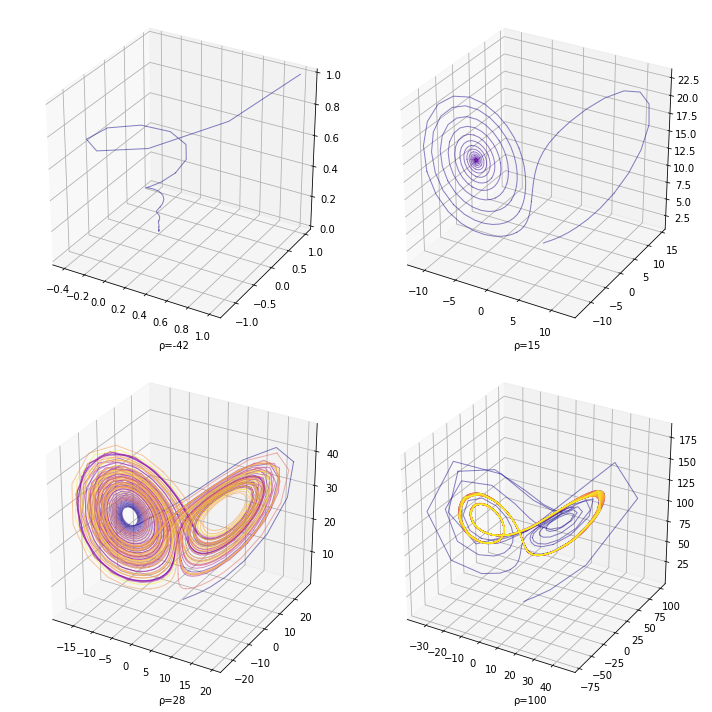

In [ ]:
# Instanciamos nuestra figura y sus axes
fig, axs = plt.subplots(rows, cols, figsize=size, subplot_kw = dict(projection='3d'))

# Transformamos el array a uno bidimensional de rows×cols
rho_values2d = np.array(rho_values).reshape(rows, cols)

# Iteramos en (0, 0), (0, 1), (1, 0), (1, 1)
for row, col in np.ndindex((rows, cols)):
  rho = rho_values2d[row ,col]
  # Introducimos el eje correspondiente en nuestra función
  lorenz_attractor((1, 1, 1),
                   (10, rho, 8/3),
                   ax=axs[row, col],
                   text_offset=-0.03)

fig.show()

## Butterflies: despedida

Para concluir el proyecto, definiremos la función `butterfly` para iterar una figura de $n×n$ dimensiones.

Lo hermoso ahora es jugar con las constantes físicas y el ángulo de visualización de los `subplots`, iterando entre los `colormaps` disponibles añadiendo un fondo negro y removiendo los ejes, dando como resultado un deleite visual por cortesía de Edward Norton Lorenz.

Gracias por adentrarte en mi proyecto y a <a href="https://www.pec3.org/">Pec3</a> por la oportunidad.

In [ ]:
fsize = (15, 15)
ndim = 8

def butterfly(ax, colormap, rho, angle):
  tmax = 100
  n = 10000
  sigma, rho, beta = (10, rho, 2.667)
  u0, v0, w0 = (0, 1, 1.05)
  t = np.linspace(0, tmax, n)

  soln = odeint(solve_lorenz, (u0, v0, w0), t, args=(sigma, rho, beta))
  # Interpolate solution onto the time grid, t.
  x, y, z = soln[:, 0], soln[:, 1], soln[:, 2]

  ax.set_facecolor('k')

  s = 10
  cmap = getattr(plt.cm, colormap)
  for i in range(0,n-s,s):
      ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color=cmap(i/n), alpha=0.4)

  # Remove all the axis clutter, leaving just the curve.
  ax.set_axis_off()
  ax.view_init(angle, angle)

axs = plt.figure(facecolor='k', figsize=fsize).subplots(ndim, ndim, subplot_kw = dict(projection='3d'))

for i, (row, col) in enumerate(np.ndindex((ndim, ndim))):
  butterfly(axs[row, col], plt.colormaps()[i], rho=2.5*i, angle=10*i)


## Bibliografía
- Boeing, G. (30 de diciembre del 2016). *Animating the Lorenz Attractor with Python*. https://geoffboeing.com/2016/12/animating-lorenz-attractor-python/.
- Dizikesarchive, P. (22 de febrero del 2011). *When the Butterfly Effect Took Flight*. MIT Technology Review. https://www.technologyreview.com/2011/02/22/196987/when-the-butterfly-effect-took-flight/.
- The Jupyter Notebook documentation. https://jupyter-notebook.readthedocs.io/en/stable/.
- The Matplotlib API Reference. https://matplotlib.org/stable/api/.
- The Numpy documentation. https://numpy.org/doc/.
- The SciPy documentation. https://docs.scipy.org/doc/scipy/.